In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('stroke_data.csv')

In [4]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
1,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
2,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
3,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
4,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0


In [5]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,29065.000000,29065.000000,29065.000000,29065.000000,29065.000000,29065.000000
mean,47.676174,0.111509,0.052159,106.405639,30.054684,0.018854
std,18.732941,0.314766,0.222351,45.272453,7.193951,0.136013
min,10.000000,0.000000,0.000000,55.010000,10.100000,0.000000
25%,32.000000,0.000000,0.000000,77.630000,25.000000,0.000000
50%,48.000000,0.000000,0.000000,92.130000,28.900000,0.000000
75%,62.000000,0.000000,0.000000,113.910000,33.900000,0.000000
max,82.000000,1.000000,1.000000,291.050000,92.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29065 entries, 0 to 29064
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             29065 non-null  object 
 1   age                29065 non-null  float64
 2   hypertension       29065 non-null  int64  
 3   heart_disease      29065 non-null  int64  
 4   ever_married       29065 non-null  object 
 5   work_type          29065 non-null  object 
 6   Residence_type     29065 non-null  object 
 7   avg_glucose_level  29065 non-null  float64
 8   bmi                29065 non-null  float64
 9   smoking_status     29065 non-null  object 
 10  stroke             29065 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 2.4+ MB


In [7]:
df['stroke'].value_counts()

stroke
0    28517
1      548
Name: count, dtype: int64

### EDA

<Axes: xlabel='gender', ylabel='count'>

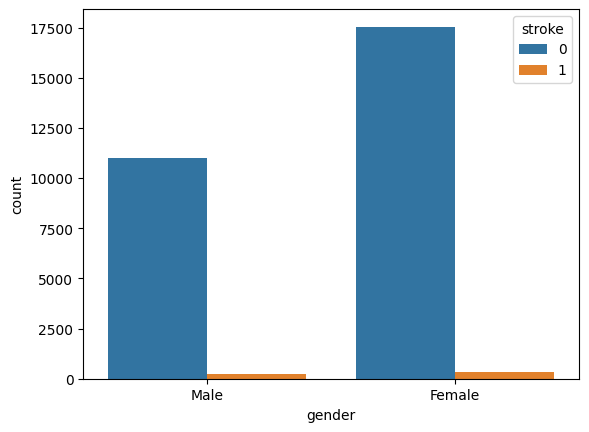

In [8]:
sns.countplot(x='gender', data=df, hue='stroke')

<Figure size 1200x600 with 0 Axes>

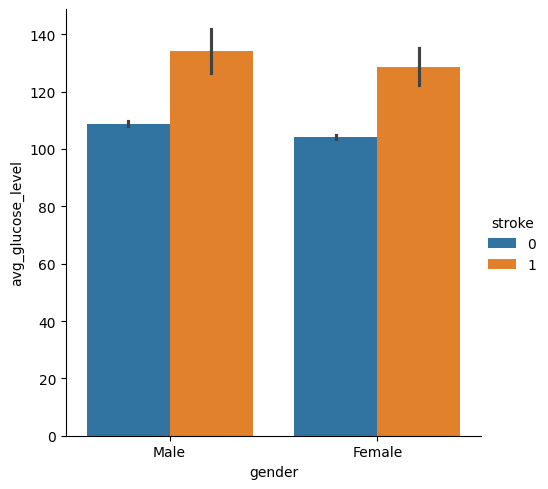

In [9]:
plt.figure(figsize=(12, 6))
sns.catplot(data=df, x='gender', y='avg_glucose_level', hue='stroke', kind='bar')

<Axes: xlabel='age', ylabel='avg_glucose_level'>

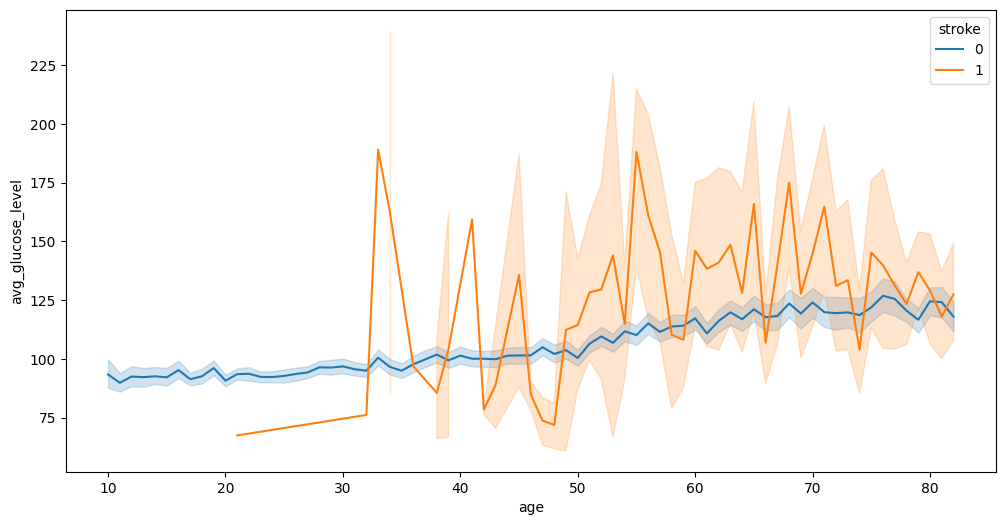

In [10]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='age', y='avg_glucose_level', data=df, hue='stroke')

<Axes: xlabel='work_type', ylabel='count'>

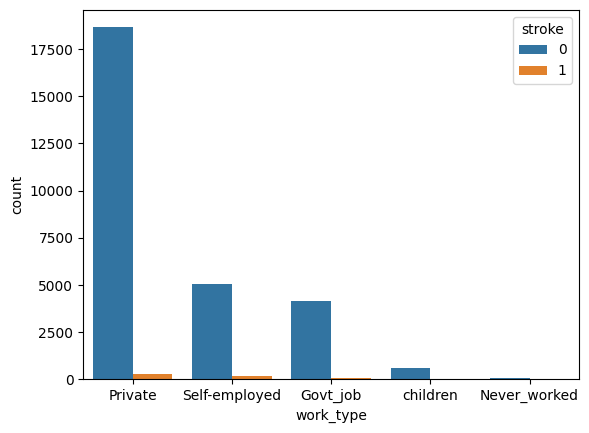

In [11]:
sns.countplot(x='work_type', data=df, hue='stroke')

In [12]:
df_stroke = df[df['stroke'] == 1]
df_stroke['age'] = df_stroke['age'].astype(int)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9520\2228965694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stroke['age'] = df_stroke['age'].astype(int)


<Axes: xlabel='age', ylabel='count'>

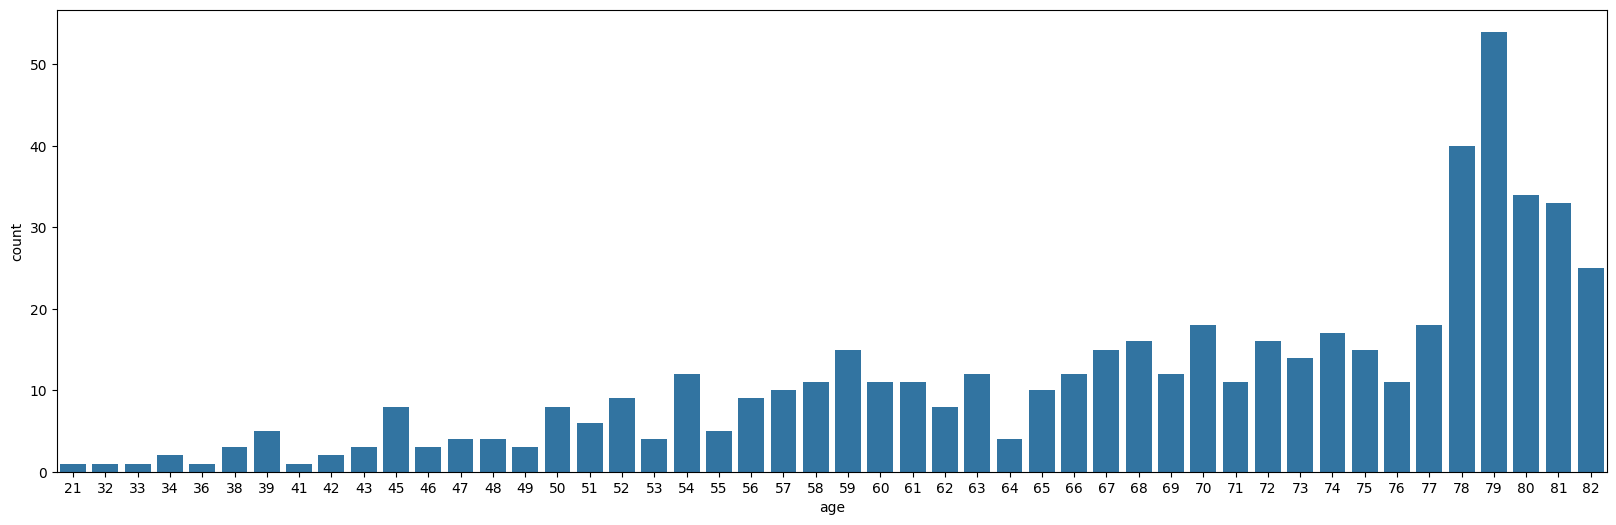

In [13]:
plt.figure(figsize=(20, 6))
sns.countplot(x='age', data=df_stroke)

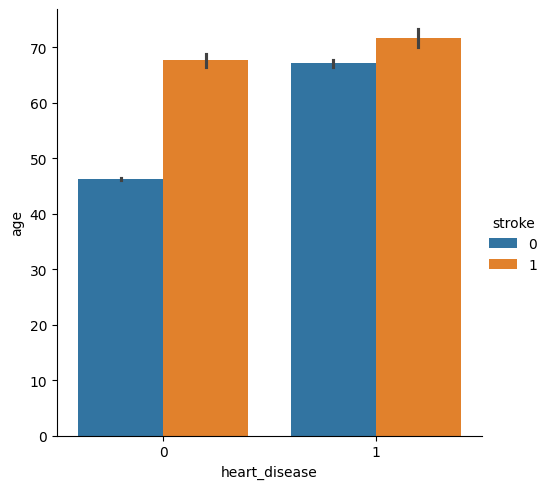

In [14]:
sns.catplot(data=df, x='heart_disease', y='age', hue='stroke', kind='bar')

In [15]:
df['work_type'].value_counts()

work_type
Private          18950
Self-employed     5204
Govt_job          4195
children           615
Never_worked       101
Name: count, dtype: int64

In [16]:
df_stroke['work_type'].value_counts()

work_type
Private          311
Self-employed    171
Govt_job          66
Name: count, dtype: int64

<Axes: xlabel='work_type', ylabel='count'>

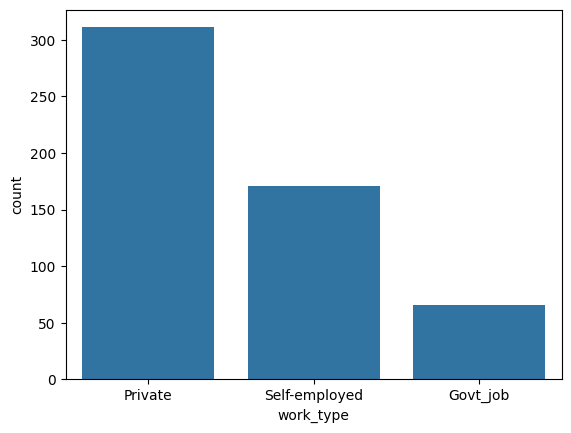

In [17]:
sns.countplot(x='work_type', data=df_stroke)

In [18]:
df_stroke['bmi'] = df_stroke['bmi'].astype(int)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9520\2668789935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stroke['bmi'] = df_stroke['bmi'].astype(int)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9520\1604365122.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_stroke['bmi'], palette='coolwarm')


<Axes: xlabel='bmi', ylabel='count'>

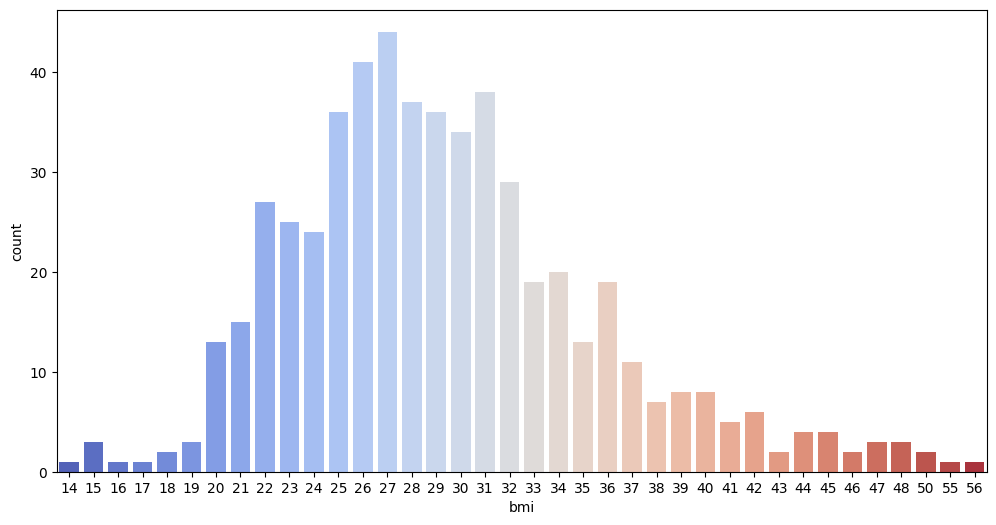

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df_stroke['bmi'], palette='coolwarm')

<Axes: xlabel='age', ylabel='bmi'>

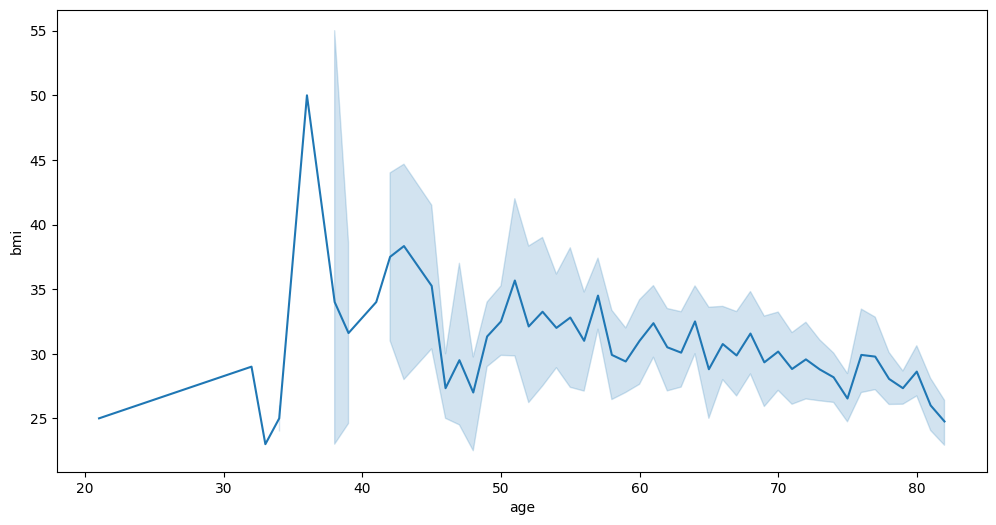

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='age', y='bmi', data=df_stroke)

### Data Preprocessing

In [21]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [22]:
gender_dummies = pd.get_dummies(df['gender'], drop_first=True, dtype=int)
df = df.drop('gender', axis=1)
df = pd.concat([df, gender_dummies], axis=1)

In [23]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [24]:
married_map = {'Yes': 1, 'No': 0}

In [25]:
df['ever_married'] = df['ever_married'].map(married_map)

In [26]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [27]:
work_dummies = pd.get_dummies(df['work_type'], drop_first=True, dtype=int)
df = df.drop('work_type', axis=1)
df = pd.concat([df, work_dummies], axis=1)

In [28]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [29]:
res_dummies = pd.get_dummies(df['Residence_type'], drop_first=True, dtype=int)
df = df.drop('Residence_type', axis=1)
df = pd.concat([df, res_dummies], axis=1)

In [30]:
df.columns

Index(['age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi', 'smoking_status', 'stroke', 'Male',
       'Never_worked', 'Private', 'Self-employed', 'children', 'Urban'],
      dtype='object')

In [31]:
smoke_dummies = pd.get_dummies(df['smoking_status'], drop_first=True, dtype=int)
df = df.drop('smoking_status', axis=1)
df = pd.concat([df, smoke_dummies], axis=1)

In [32]:
df.columns

Index(['age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi', 'stroke', 'Male', 'Never_worked', 'Private',
       'Self-employed', 'children', 'Urban', 'never smoked', 'smokes'],
      dtype='object')

In [33]:
df['age'] = df['age'].astype(int)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29065 entries, 0 to 29064
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                29065 non-null  int32  
 1   hypertension       29065 non-null  int64  
 2   heart_disease      29065 non-null  int64  
 3   ever_married       29065 non-null  int64  
 4   avg_glucose_level  29065 non-null  float64
 5   bmi                29065 non-null  float64
 6   stroke             29065 non-null  int64  
 7   Male               29065 non-null  int32  
 8   Never_worked       29065 non-null  int32  
 9   Private            29065 non-null  int32  
 10  Self-employed      29065 non-null  int32  
 11  children           29065 non-null  int32  
 12  Urban              29065 non-null  int32  
 13  never smoked       29065 non-null  int32  
 14  smokes             29065 non-null  int32  
dtypes: float64(2), int32(9), int64(4)
memory usage: 2.3 MB


### Train Test Split

In [35]:
X = df.drop('stroke', axis=1).values
y = df['stroke'].values

In [36]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X, y = smote.fit_resample(X, y)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Data Scaling

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()

In [41]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
X_train

array([[0.69678531, 0.0842711 , 0.        , ..., 0.        , 0.9157289 ,
        0.0842711 ],
       [0.68213674, 0.27846131, 0.27846131, ..., 0.        , 0.72153869,
        0.        ],
       [0.31944444, 0.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.80555556, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.45833333, 0.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.98611111, 0.        , 0.        , ..., 0.64583725, 0.35416275,
        0.        ]])

In [43]:
X_train.shape

(39923, 14)

In [44]:
X_test.shape

(17111, 14)

### Assigning weights

In [45]:
#class_weights = {0: 1, 1: 7}

### Building the model

In [46]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.constraints import max_norm

In [47]:
model = Sequential()

# Input Layer
model.add(Dense(14, activation='relu'))

# Hidden Layer
model.add(Dense(7, activation='relu'))

# Hidden Layer
model.add(Dense(3, activation='relu'))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

# Model compile
model.compile(loss='binary_crossentropy', optimizer='adam')

In [48]:
from tensorflow.keras.callbacks import EarlyStopping

In [49]:
early_stop = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=17)

In [50]:
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/100

2496/2496 [==============================] - 6s 2ms/step - loss: 0.4779 - val_loss: 0.3997
Epoch 2/100
2496/2496 [==============================] - 4s 2ms/step - loss: 0.3545 - val_loss: 0.3278
Epoch 3/100
2496/2496 [==============================] - 4s 2ms/step - loss: 0.2956 - val_loss: 0.2811
Epoch 4/100
2496/2496 [==============================] - 4s 2ms/step - loss: 0.2620 - val_loss: 0.2595
Epoch 5/100
2496/2496 [==============================] - 5s 2ms/step - loss: 0.2382 - val_loss: 0.2396
Epoch 6/100
2496/2496 [==============================] - 5s 2ms/step - loss: 0.2232 - val_loss: 0.2497
Epoch 7/100
2496/2496 [==============================] - 5s 2ms/step - loss: 0.2140 - val_loss: 0.2131
Epoch 8/100
2496/2496 [==============================] - 4s 2ms/step - loss: 0.2066 - val_loss: 0.2134
Epoch 9/100
2496/2496 [==============================] - 4s 2ms/step - loss: 0.2008 - val_loss: 0.2108
Epoch 10/100
2496/2496 [==============================] - 4s 2ms/step - 

In [51]:
loss = pd.DataFrame(model.history.history)

In [52]:
loss

,loss,val_loss
0,0.477871,0.399675
1,0.354454,0.327773
2,0.295625,0.281121
3,0.261977,0.259494
4,0.238150,0.239605
5,0.223180,0.249655
6,0.213997,0.213114
7,0.206650,0.213367
8,0.200802,0.210829
9,0.195626,0.204227


<Axes: >

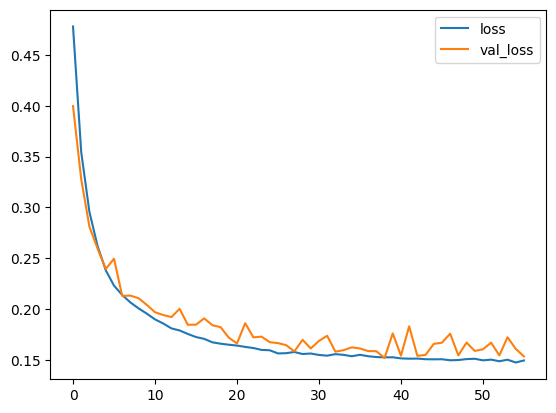

In [53]:
loss.plot()

In [54]:
from sklearn.metrics import classification_report

In [55]:
predictions = model.predict(X_test)

predictions = np.round(predictions).astype(int)

535/535 [==============================] - 1s 996us/step


In [56]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      8506
           1       0.95      0.93      0.94      8605

    accuracy                           0.94     17111
   macro avg       0.94      0.94      0.94     17111
weighted avg       0.94      0.94      0.94     17111

